# A program to prep data and engineer features
This notebook illustrates some of the common data wrangling tasks. The columns chosen for specific tasks are not intentional but for illustration purposes only.

In [1]:
import pandas as pd
import numpy as np
import sweetviz as sv
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

# MinMaxScaler for normalizing data, StandardScaler for standardizing data
from sklearn.preprocessing import MinMaxScaler,  StandardScaler
 

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:

df_temp = pd.read_pickle(r'/path/name.pkl')


In [4]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12906 entries, 0 to 12905
Data columns (total 34 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   patient_id                        12906 non-null  int64  
 1   DiagPeriodL90D                    12906 non-null  int64  
 2   patient_age                       12906 non-null  int64  
 3   education_bachelors               12905 non-null  float64
 4   income_individual_median          12905 non-null  float64
 5   home_value                        12902 non-null  float64
 6   commute_time                      12905 non-null  float64
 7   health_uninsured                  12905 non-null  float64
 8   widowed                           12905 non-null  float64
 9   education_less_highschool         12905 non-null  float64
 10  patient_race                      6521 non-null   object 
 11  patient_state                     12855 non-null  object 
 12  Regi

# Feature engineering
The goal of feature engineering is to improve performance of features by a number of approaches, such as imputing missing values of a feature, encoding a nominal feature, binning/standardizing/rescaling a numeric feature with continuous values, creating a new feature by combining 2 or more features, etc.

## Categorical-Nominal Features
There are some interesting nominal features, such as patient_race and payor_type, which will need to be encoded with each value becoming a column.  For example, the feature patient_race with values white, black, hispanic, asian, and other would become 5 columns: race_white, race_black, race_hispanic, race_asian, and race_other. If the patient falls under Other, race_other would show 1 while all other race related columns would show 0.


### Patient race
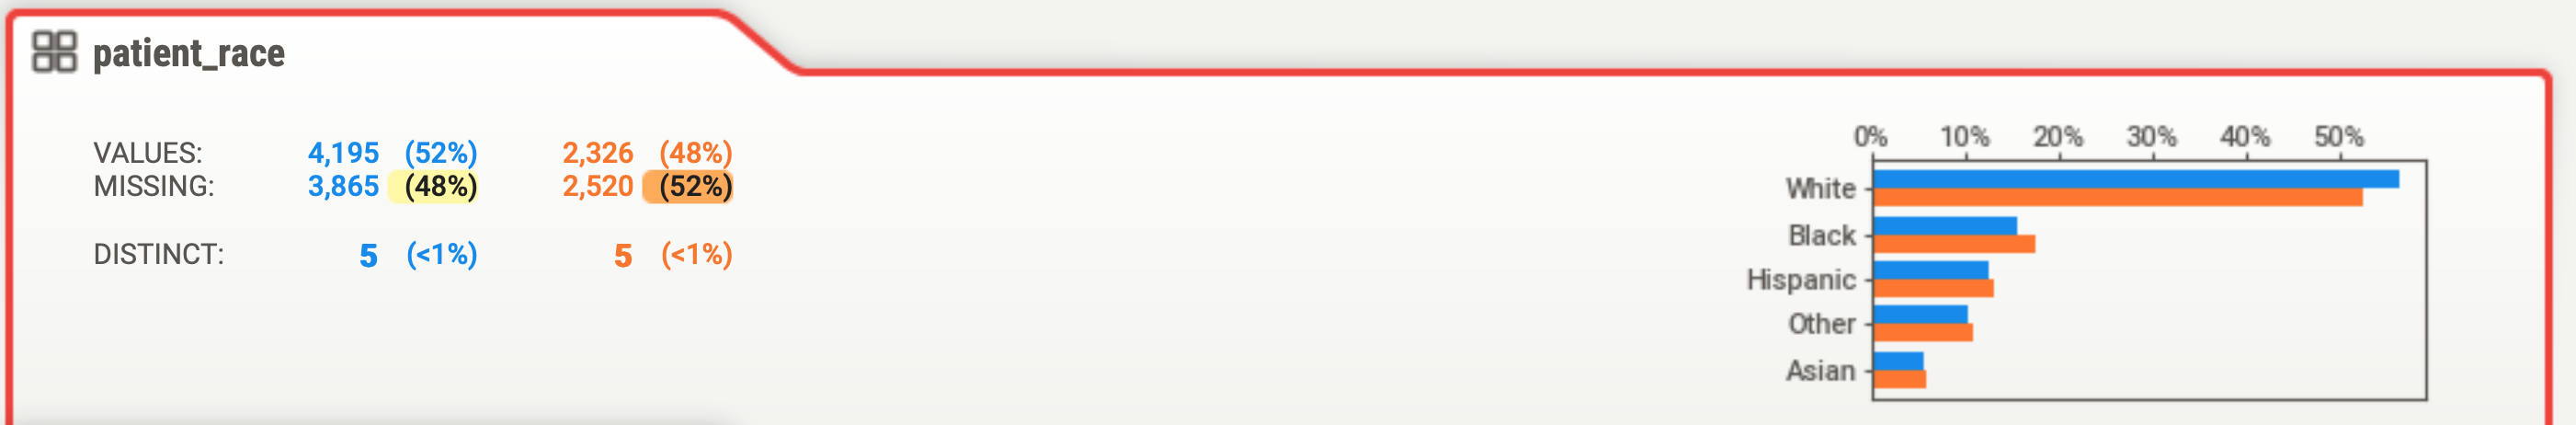

In [5]:
# Perform one-hot encoding with a prefix
one_hot_encoded = pd.get_dummies(df_temp['patient_race'], prefix='patrace')

# Concatenate the one-hot encoded columns to the original data frame
df_encoded = pd.concat([df_temp, one_hot_encoded], axis=1)

In [6]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12906 entries, 0 to 12905
Data columns (total 39 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   patient_id                        12906 non-null  int64  
 1   DiagPeriodL90D                    12906 non-null  int64  
 2   patient_age                       12906 non-null  int64  
 3   education_bachelors               12905 non-null  float64
 4   income_individual_median          12905 non-null  float64
 5   home_value                        12902 non-null  float64
 6   commute_time                      12905 non-null  float64
 7   health_uninsured                  12905 non-null  float64
 8   widowed                           12905 non-null  float64
 9   education_less_highschool         12905 non-null  float64
 10  patient_race                      6521 non-null   object 
 11  patient_state                     12855 non-null  object 
 12  Regi

In [7]:
# Look at org and newly created cols

df_check = df_encoded[['patient_race', 'patrace_White', 'patrace_Black', 'patrace_Hispanic', 
                       'patrace_Asian', 'patrace_Other']]
df_check.head(50)

,patient_race,patrace_White,patrace_Black,patrace_Hispanic,patrace_Asian,patrace_Other
0,NaN,0,0,0,0,0
1,White,1,0,0,0,0
2,White,1,0,0,0,0
3,White,1,0,0,0,0
4,NaN,0,0,0,0,0
5,White,1,0,0,0,0
6,NaN,0,0,0,0,0
7,White,1,0,0,0,0
8,White,1,0,0,0,0
9,NaN,0,0,0,0,0


## Numeric Features

### Normalizing/Standardizing
Some columns we have are of vastly different scales. Algorithms, such as neural networks, would not treat them equally, and therefore, it would be better to normalize them. One example is labor_force_participation, which ranges from 31 to 79, while limited_english ranges between 0 and 27.<br>
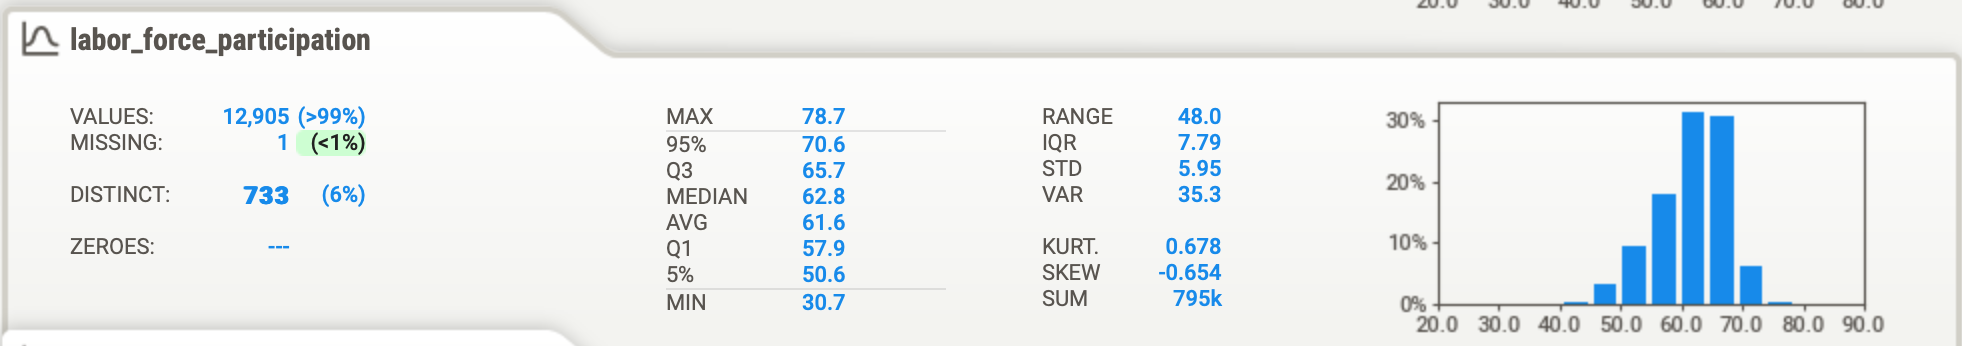
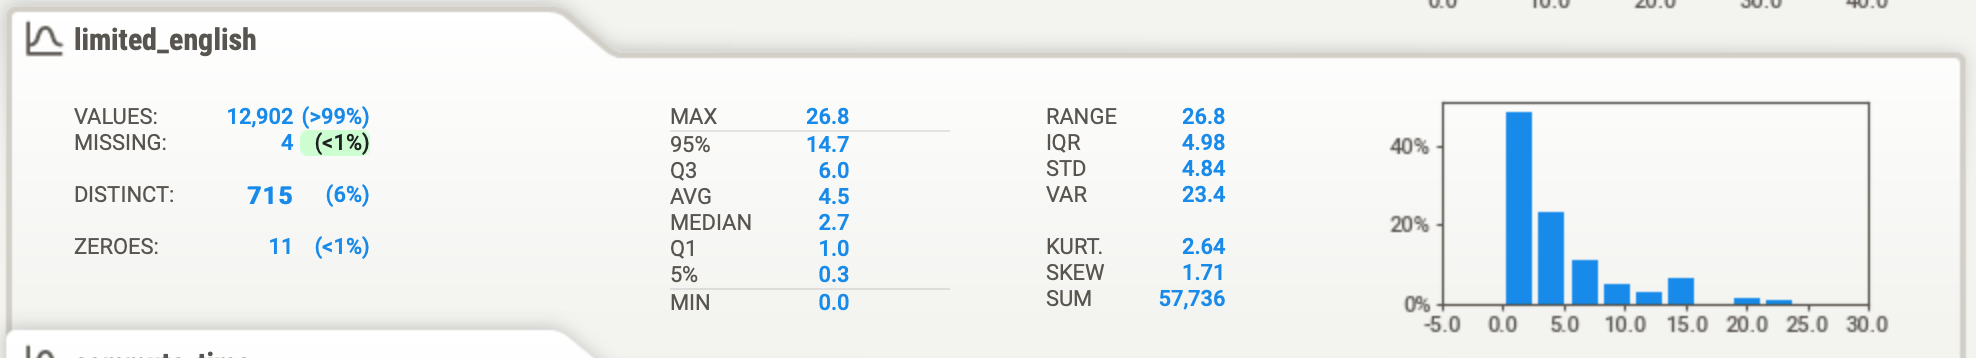

<b> Normalization</b>
<br> Rescale a column to a 0-to-1 range.

In [8]:
# Define scalere

scaler = MinMaxScaler()

df_encoded[['labor_force_participation_n', 'limited_english_n']] = scaler.fit_transform(df_encoded[[
    'labor_force_participation', 'limited_english']])

In [9]:
print(df_encoded['labor_force_participation_n'].describe())
print('---------------------------------------')
print(df_encoded['limited_english_n'].describe())

count    12905.000000
mean         0.644566
std          0.123939
min          0.000000
25%          0.567832
50%          0.668705
75%          0.730290
max          1.000000
Name: labor_force_participation_n, dtype: float64
---------------------------------------
count    12902.000000
mean         0.167257
std          0.180792
min          0.000000
25%          0.037169
50%          0.102681
75%          0.223360
max          1.000000
Name: limited_english_n, dtype: float64


We can quickly confirm the normalized features by looking at the min and max above.

<b>Standardization</b>
<br>Rescale a column so the mean = 0 and standard deviation = 1.

In [10]:
# Define scaler

scaler = StandardScaler()

# Standardize data

df_encoded[['labor_force_participation_s', 'limited_english_s']] = scaler.fit_transform(df_encoded[[
    'labor_force_participation', 'limited_english']])

In [11]:
# Check

print(df_encoded['labor_force_participation_s'].describe())
print('---------------------------------------')
print(df_encoded['limited_english_s'].describe())

count    1.290500e+04
mean    -9.636271e-17
std      1.000039e+00
min     -5.200871e+00
25%     -6.191551e-01
50%      1.947699e-01
75%      6.916846e-01
max      2.867920e+00
Name: labor_force_participation_s, dtype: float64
---------------------------------------
count    1.290200e+04
mean    -2.093608e-16
std      1.000039e+00
min     -9.251708e-01
25%     -7.195753e-01
50%     -3.571988e-01
75%      3.103320e-01
max      4.606268e+00
Name: limited_english_s, dtype: float64


We can quickly verify by looking at the mean and std of the standardized features above. Below shows the distribution of the original features.

In [12]:
print(df_encoded['labor_force_participation'].describe())
print('---------------------------------------')
print(df_encoded['limited_english'].describe())

count    12905.000000
mean        61.619846
std          5.945359
min         30.700000
25%         57.938889
50%         62.777778
75%         65.732000
max         78.670000
Name: labor_force_participation, dtype: float64
---------------------------------------
count    12902.000000
mean         4.474956
std          4.837085
min          0.000000
25%          0.994444
50%          2.747222
75%          5.976000
max         26.755000
Name: limited_english, dtype: float64


 <b><font color=blue>Q: When to normalize vs standardize?
    <br> A: If the column of interest has a normal distribution, one should standardize. Otherwise, one should normalize.</font></b>

### Binning
Another approach to engineer a numeric column is to classify values in bins. For health_uninsured_rnd, and limited_english_rnd, binning is done by previously looking at frequency tables. The bins are then subjective determined.

In [13]:
# Round health_uninsured and limited_english from float to integer

df_encoded['health_uninsured_rnd'] = round(df_encoded.health_uninsured, 0)

In [14]:
df_encoded['limited_english_rnd'] = round(df_encoded.limited_english, 0)

In [15]:
# Create an UDF for binning

def binning(var):
    if var <= 7:
        return 1
    elif 7 < var <= 14:
        return 2
    elif 14 < var <= 21:
        return 3
    elif var > 21:
        return 4


In [16]:
# health_uninsured - Apply UDF and check recode
    
df_encoded['health_uninsured_binned'] = df_encoded['health_uninsured_rnd'].apply(binning)

pd.crosstab(df_encoded.health_uninsured_binned, df_encoded.health_uninsured_rnd)

health_uninsured_rnd,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,23.0,26.0,28.0
health_uninsured_binned,,,,,,,,,,,,,,,,,,,,,,,
1.0,4,409,1198,1491,1655,1904,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2.0,0,0,0,0,0,0,1546,851,560,551,554,417,560,0,0,0,0,0,0,0,0,0,0
3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,298,247,102,114,115,82,54,0,0,0
4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,137,7,49


In [17]:
# limited_English - Apply UDF and check recode

df_encoded['limited_english_binned'] = df_encoded['limited_english_rnd'].apply(binning)

pd.crosstab(df_encoded.limited_english_binned, df_encoded.limited_english_rnd)

limited_english_rnd,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,19.0,20.0,21.0,22.0,23.0,27.0
limited_english_binned,,,,,,,,,,,,,,,,,,,,,,,
1.0,1520,2908,1478,1664,1015,724,578,498,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2.0,0,0,0,0,0,0,0,0,561,294,91,43,166,232,391,0,0,0,0,0,0,0,0
3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,288,113,38,30,143,0,0,0
4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,49,71,7


### Create an interaction term (new feature)

In [18]:
# Combine 2 features to create a new one

df_encoded['hlth_unins_lmtd_eng'] = df_encoded['limited_english_binned'] + df_encoded['health_uninsured_binned']


In [19]:
df_check = df_encoded[['hlth_unins_lmtd_eng', 'limited_english_binned', 'health_uninsured_binned', 
                       'DiagPeriodL90D']]
print(df_check)

       hlth_unins_lmtd_eng  limited_english_binned  health_uninsured_binned  \
0                      4.0                     2.0                      2.0   
1                      3.0                     2.0                      1.0   
2                      4.0                     1.0                      3.0   
3                      2.0                     1.0                      1.0   
4                      3.0                     1.0                      2.0   
5                      2.0                     1.0                      1.0   
6                      5.0                     3.0                      2.0   
7                      3.0                     1.0                      2.0   
8                      2.0                     1.0                      1.0   
9                      2.0                     1.0                      1.0   
10                     3.0                     1.0                      2.0   
11                     5.0                     3.0  

In [20]:
# Median-fill the rest of the DF

df_encoded.fillna(df_temp.median(numeric_only=True).round(1),inplace=True)

## Assess effectiveness of recoded and newly created features

In [21]:
df_check = df_encoded[['DiagPeriodL90D', 
                       'hlth_unins_lmtd_eng', 'limited_english_binned', 'health_uninsured_binned',
                       'limited_english', 'health_uninsured',
                       'labor_force_participation', 'labor_force_participation_n', 'labor_force_participation_s',
                       'limited_english', 'limited_english_n', 'limited_english_s']]


In [22]:
df_check.head(50)

,DiagPeriodL90D,hlth_unins_lmtd_eng,limited_english_binned,health_uninsured_binned,limited_english,health_uninsured,labor_force_participation,labor_force_participation_n,labor_force_participation_s,limited_english,limited_english_n,limited_english_s
0,1,4.0,2.0,2.0,10.100000,11.200000,61.528571,0.642664,-0.015353,10.100000,0.377500,1.162945
1,1,3.0,2.0,1.0,8.057576,7.018182,65.230303,0.719831,0.607297,8.057576,0.301161,0.740685
2,1,4.0,1.0,3.0,3.356667,15.066667,66.428333,0.744806,0.808811,3.356667,0.125459,-0.231200
3,0,2.0,1.0,1.0,5.280952,4.404762,64.430952,0.703168,0.472842,5.280952,0.197382,0.166635
4,0,3.0,1.0,2.0,1.946000,12.088000,57.488000,0.558432,-0.694997,1.946000,0.072734,-0.522847
5,0,2.0,1.0,1.0,0.638235,4.797143,60.934286,0.630275,-0.115315,0.638235,0.023855,-0.793219
6,1,5.0,3.0,2.0,14.737500,10.341538,64.387692,0.702266,0.465565,14.737500,0.550832,2.121720
7,1,3.0,1.0,2.0,0.503333,8.753333,61.740000,0.647071,0.020211,0.503333,0.018813,-0.821110
8,0,2.0,1.0,1.0,1.620968,6.645313,51.718462,0.438158,-1.665462,1.620968,0.060586,-0.590045
9,1,2.0,1.0,1.0,0.190566,4.684906,64.432075,0.703191,0.473031,0.190566,0.007123,-0.885772


In [23]:
df_check.corrwith(df_check['DiagPeriodL90D']).sort_values(ascending=False) 

DiagPeriodL90D                 1.000000
labor_force_participation_s    0.028169
labor_force_participation_n    0.028169
labor_force_participation      0.028148
limited_english_binned        -0.008454
limited_english               -0.011353
limited_english               -0.011353
limited_english_n             -0.011443
limited_english_s             -0.011443
health_uninsured              -0.028538
hlth_unins_lmtd_eng           -0.029667
health_uninsured_binned       -0.034340
dtype: float64

In [24]:
df_encoded.corrwith(df_temp['DiagPeriodL90D']).sort_index() #.sort_values(ascending=False)

DiagPeriodL90D                 1.000000
Ozone                          0.007877
bmi                           -0.008980
commute_time                  -0.027370
education_bachelors            0.037706
education_less_highschool     -0.035928
health_uninsured              -0.028538
health_uninsured_binned       -0.034340
health_uninsured_rnd          -0.028278
hispanic                      -0.004961
hlth_unins_lmtd_eng           -0.029667
home_ownership                -0.000295
home_value                     0.030243
income_individual_median       0.033219
labor_force_participation      0.028148
labor_force_participation_n    0.028169
labor_force_participation_s    0.028169
limited_english               -0.011353
limited_english_binned        -0.008454
limited_english_n             -0.011443
limited_english_rnd           -0.010669
limited_english_s             -0.011443
patient_age                    0.055634
patient_id                     0.002405
patrace_Asian                  0.001980


In [25]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12906 entries, 0 to 12905
Data columns (total 48 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   patient_id                        12906 non-null  int64  
 1   DiagPeriodL90D                    12906 non-null  int64  
 2   patient_age                       12906 non-null  int64  
 3   education_bachelors               12906 non-null  float64
 4   income_individual_median          12906 non-null  float64
 5   home_value                        12906 non-null  float64
 6   commute_time                      12906 non-null  float64
 7   health_uninsured                  12906 non-null  float64
 8   widowed                           12906 non-null  float64
 9   education_less_highschool         12906 non-null  float64
 10  patient_race                      6521 non-null   object 
 11  patient_state                     12855 non-null  object 
 12  Regi

In [26]:
df_encoded.to_pickle(r'/path/name.pkl')